In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from planners.basic_prm import BasicPRM
from utils.collision_checker import CollisionChecker
from environment import get_all_scenes  # Stelle sicher, dass das korrekt importiert ist

In [19]:
def visualize_path(prm, path, scene, limits, start, goal, title=""):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Hindernisse zeichnen
    for shape in scene.values():
        xs, ys = shape.exterior.xy if hasattr(shape, 'exterior') else shape.xy
        ax.fill(xs, ys, color='lightcoral', alpha=0.7)

    pos = nx.get_node_attributes(prm.graph, 'pos')

    # Alle Knoten
    nx.draw_networkx_nodes(prm.graph, pos, node_size=30, ax=ax)
    nx.draw_networkx_edges(prm.graph, pos, alpha=0.3, ax=ax)

    # Pfad markieren
    if path:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(prm.graph, pos, edgelist=path_edges, width=3, edge_color='green', ax=ax)

    ax.plot(start[0][0], start[0][1], "go", markersize=10, label="Start")
    ax.plot(goal[0][0], goal[0][1], "ro", markersize=10, label="Ziel")

    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    ax.set_aspect("equal")
    ax.grid(True)
    ax.legend()
    plt.title(title)
    plt.show()


🔍 Szene: U-Shape
✅ Pfad gefunden in Szene: U-Shape, Länge: 20


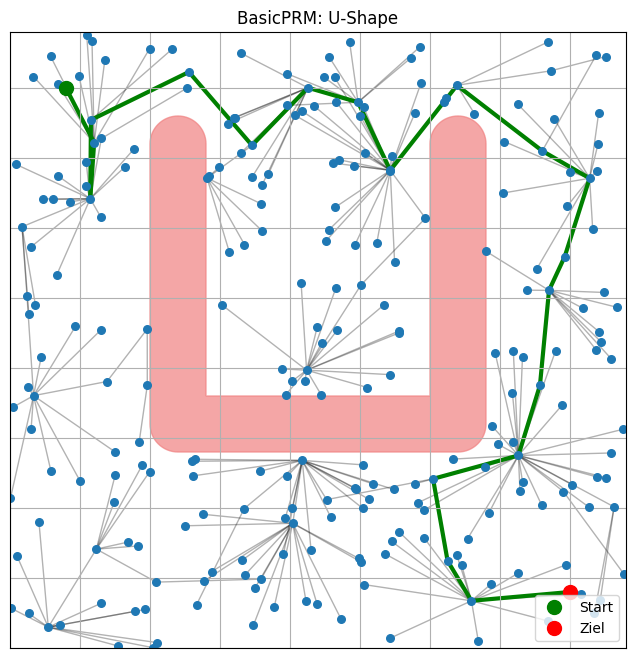


🔍 Szene: L-Shape
✅ Pfad gefunden in Szene: L-Shape, Länge: 13


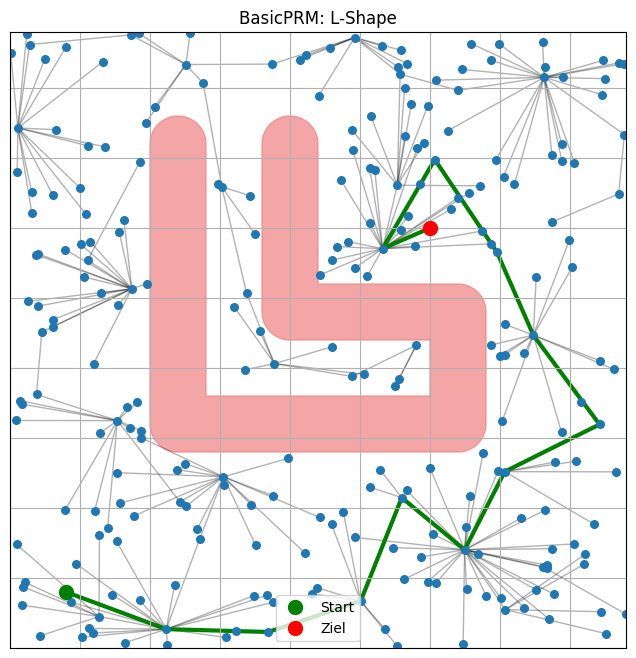


🔍 Szene: Cross-Shape
✅ Pfad gefunden in Szene: Cross-Shape, Länge: 18


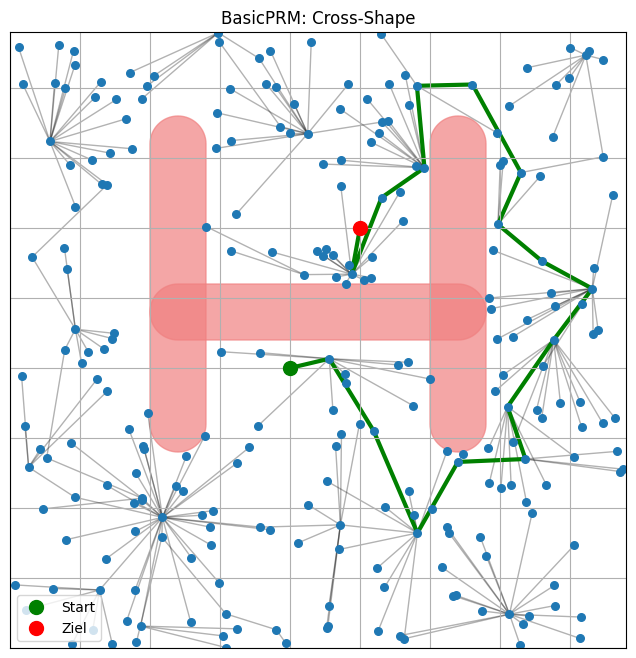


🔍 Szene: Corridor
❌ Kein Pfad gefunden in Szene: Corridor


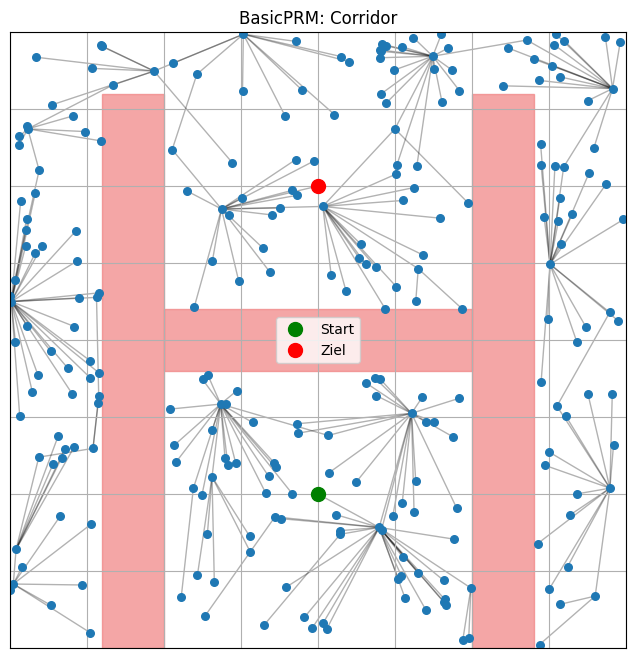


🔍 Szene: Complex Shape
✅ Pfad gefunden in Szene: Complex Shape, Länge: 17


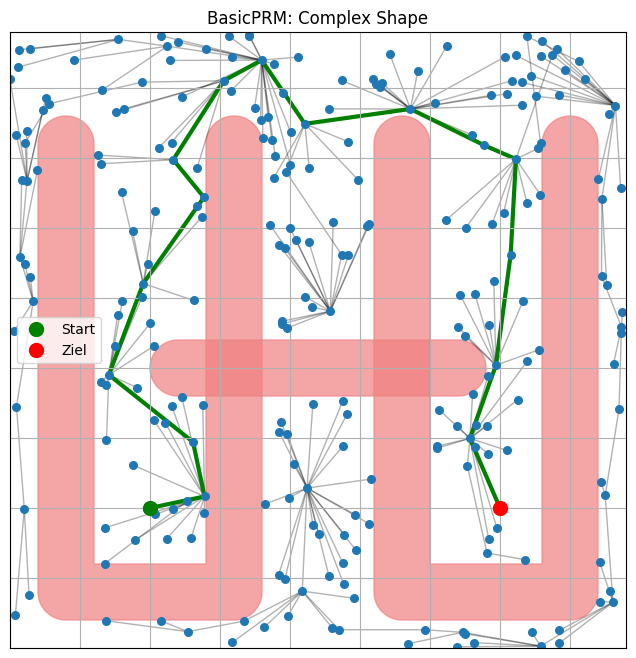


🔍 Szene: Multiple Obstacles
✅ Pfad gefunden in Szene: Multiple Obstacles, Länge: 14


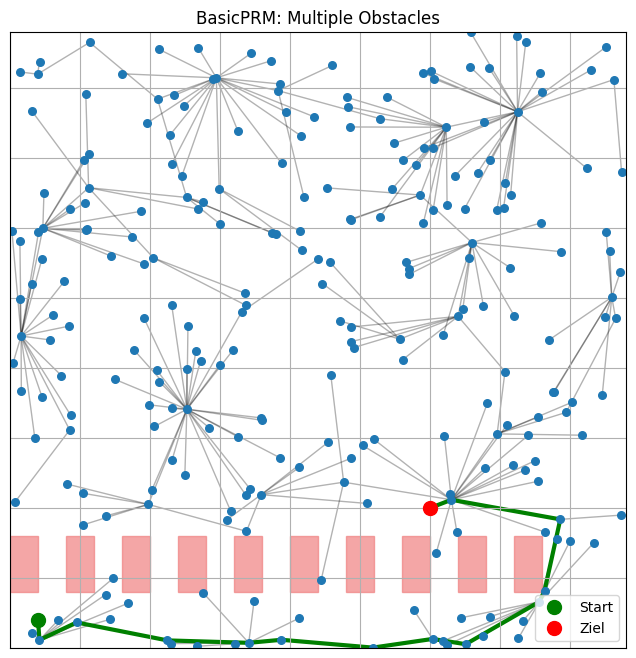


🔍 Szene: Random Obstacles
✅ Pfad gefunden in Szene: Random Obstacles, Länge: 18


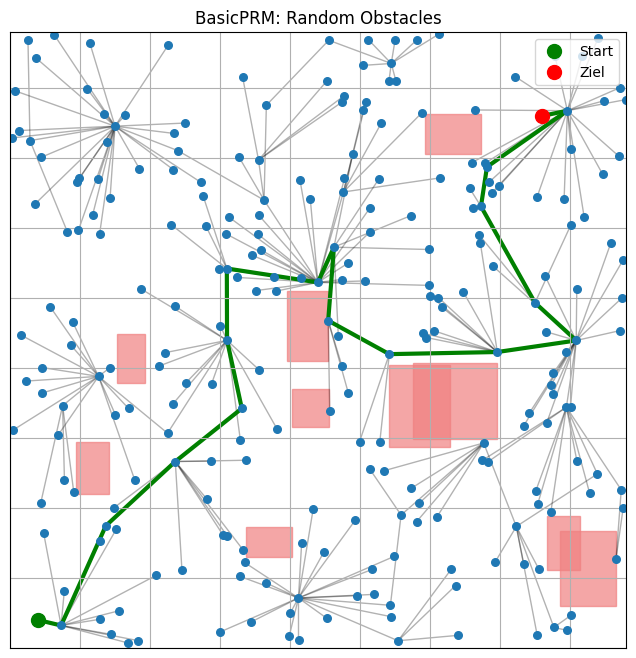

In [20]:
# ---- Konfiguration für PRM ----
config = {
    "numNodes": 250,
    "radius": 4.0
}

# ---- Alle Szenen durchlaufen ----
scenes = get_all_scenes()

for scene_name, (scene, limits, (start_pos, goal_pos)) in scenes:
    print(f"\n🔍 Szene: {scene_name}")
    start = [list(start_pos)]
    goal = [list(goal_pos)]

    # CollisionChecker instanziieren
    collision_checker = CollisionChecker(scene, limits)

    # PRM-Planer initialisieren
    planner = BasicPRM(collision_checker, limits)

    # Planung starten
    path = planner.plan_path(start, goal, config)

    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {scene_name}")
    else:
        print(f"✅ Pfad gefunden in Szene: {scene_name}, Länge: {len(path)}")

    # Visualisierung (optional, kann deaktiviert werden)
    visualize_path(planner, path, scene, limits, start, goal, title=f"BasicPRM: {scene_name}")

In [21]:
from scipy.spatial.distance import euclidean

if path:
    coords = planner.get_path_coordinates(path)
    length = sum(euclidean(a, b) for a, b in zip(coords[:-1], coords[1:]))
    print(f"Pfadlänge: {length:.2f}")
else:
    print("Keine Pfadlänge berechenbar.")


Pfadlänge: 44.52
